Abhay Singh

Email: abhay.s-26@scds.saiuniversity.edu.in

School of Computing and Data Science

### Fine Tuning for model **DenseNet201**

> Add blockquote



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/DLPROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DLPROJECT/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DLPROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DLPROJECT/y_test.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (383, 299, 299, 3)
X_test_std_shape: (128, 299, 299, 3)


In [5]:
model2_FT = keras.models.load_model('/content/drive/MyDrive/DLPROJECT/01_DenseNet201_TransferLearning_Best_Model.keras')

In [6]:
model2_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 305, 305, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 150, 150, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 150, 150, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 150, 150, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 152, 152, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 75, 75, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 75, 75, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 75, 75, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 75, 75, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 75, 75, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 75, 75, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 75, 75, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 75, 75, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 18,360,398 (70.04 MB)

 Trainable params: 11,524 (45.02 KB)

 Non-trainable params: 18,325,824 (69.91 MB)

 Optimizer params: 23,050 (90.04 KB)

In [7]:
print(len(model2_FT.layers))
print(int(0.35*(len(model2_FT.layers))))

711
248


In [8]:
for layer in model2_FT.layers[:int(0.35*(len(model2_FT.layers)))]:
  layer.trainable = False

for layer in model2_FT.layers[int(0.35*(len(model2_FT.layers))):]:
  layer.trainable = True

In [9]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT2.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history2_FineTune = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 818s 24s/step - accuracy: 0.6568 - loss: 1.3031 - val_accuracy: 0.3333 - val_loss: 154.6512
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 361ms/step - accuracy: 0.6996 - loss: 0.7834 - val_accuracy: 0.4615 - val_loss: 57.0496
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 368ms/step - accuracy: 0.8560 - loss: 0.5039 - val_accuracy: 0.5385 - val_loss: 16.2549
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 0.8940 - loss: 0.2823 - val_accuracy: 0.5641 - val_loss: 9.9101
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.8646 - loss: 0.3782 - val_accuracy: 0.5128 - val_loss: 12.4795
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9022 - loss: 0.2568 - val_accuracy: 0.2564 - val_loss: 16.6772
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.9488 - loss: 0.1631 - val_accuracy: 0.5641 - val_loss: 2.7224
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 356ms/step - accuracy: 0.9571 - loss: 0.1059 - val_a

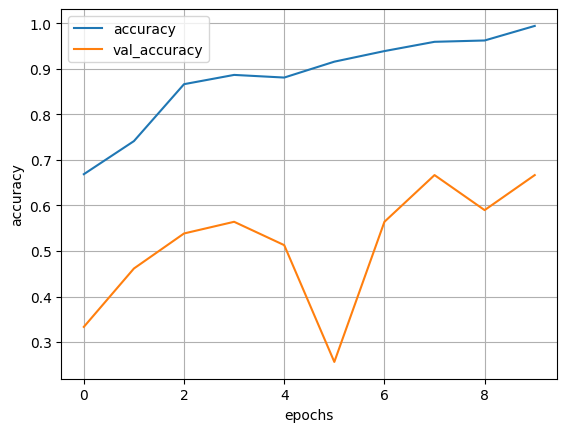

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history2_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - accuracy: 0.6771 - loss: 2.1749
Test-loss: 1.896568, Test-accuracy: 0.710938


In [12]:
model2_FT.load_weights("bestFT2.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.7573 - loss: 2.3470
Test-loss: 2.107288, Test-accuracy: 0.781250


In [13]:
y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step
[3 3 3 1 2 3 3 3 1 3 0 0 1 3 1 1 3 2 1 1 3 2 1 3 2 1 1 1 1 0 1 3 3 0 1 1 3
 1 3 1 2 2 3 3 0 3 2 0 1 1 1 0 1 3 3 0 3 1 3 1 0 2 3 3 0 1 0 2 0 1 1 3 3 3
 3 3 1 3 1 3 1 3 3 2 3 3 1 3 1 3 0 1 1 1 3 1 1 3 3 3 1 0 0 1 1 3 2 3 1 1 3
 2 1 1 0 3 1 1 3 3 3 1 0 3 1 3 3 3]


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[14,  5,  0,  6],
       [ 1, 31,  0,  3],
       [ 1,  7, 12,  0],
       [ 1,  4,  0, 43]])

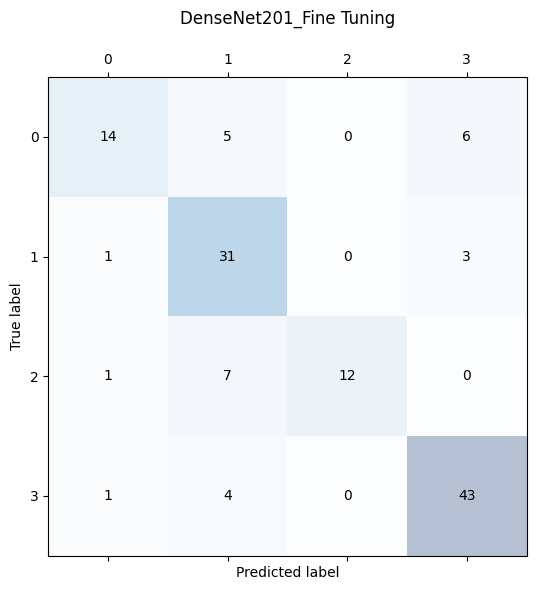

In [15]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('DenseNet201_Fine Tuning\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.8075441356984692
Recall:  0.78125
F1-score:  0.7766412601626016






In [17]:
model2_FT.save('/content/drive/MyDrive/DLPROJECT/FT_InceptionResNetV2_Best_Model.keras')